In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/city_day.csv')

In [ ]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
data.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
feature_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

In [ ]:
# Splitting the dataset into features (X) and target (y)
X = data[feature_columns]
y = data['AQI']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Defining and compiling the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Training the model
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_split=0.2)

Epoch 1/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 28252.7148 - val_loss: 19307.8301
Epoch 2/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12765.4521 - val_loss: 4869.5879
Epoch 3/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4108.5454 - val_loss: 3107.9814
Epoch 4/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2742.0081 - val_loss: 2069.3745
Epoch 5/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1833.4587 - val_loss: 1479.2744
Epoch 6/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1448.1748 - val_loss: 1185.6056
Epoch 7/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1162.3391 - val_loss: 1000.8746
Epoch 8/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1105.3221 - val_loss: 910.5922
Epoch 9/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1029.2380 - val_loss: 852.3654
Epoch 10/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 928.8045 - val_loss: 808.8192
Epoch 11/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 918.9528

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on Test Data:", loss)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 495.3841
Mean Squared Error on Test Data: 441.42279052734375


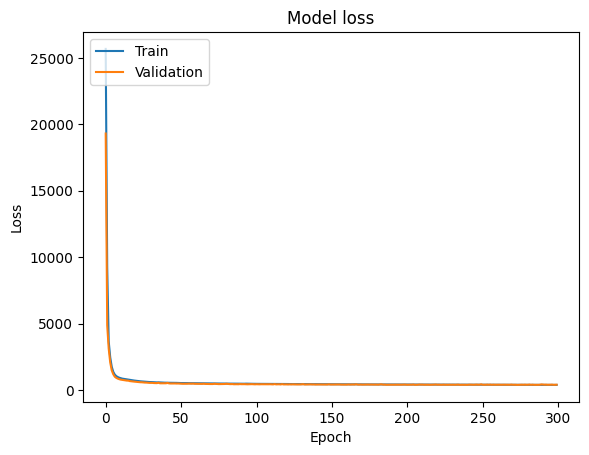

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save('model_final.h5')

In [ ]:
user_input = pd.DataFrame({
    'PM2.5': [14.41],
    'PM10': [66.81],
    'NO': [6.22],
    'NO2': [40.06],
    'NOx': [26.1],
    'NH3': [7.51],
    'CO': [1.07],
    'SO2': [13.23],
    'O3': [27.34],
    'Benzene': [2.55],
    'Toluene': [8.98],
    'Xylene': [1.45]
})

user_input_scaled = scaler.transform(user_input)

user_pred = model.predict(user_input_scaled)

print(f"Predicted AQI: {user_pred[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted AQI: 83.80622100830078


In [ ]:
if user_pred[0][0] <= 50:
  print("Good")
elif user_pred[0][0] > 50 and user_pred[0][0] <= 100:
  print("Moderate")
elif user_pred[0][0] > 100 and user_pred[0][0] <= 200:
  print("Poor")
elif user_pred[0][0] > 200 and user_pred[0][0] <= 300:
  print("Unhealthy")
elif user_pred[0][0] > 300 and user_pred[0][0] <= 400:
  print("Severe")
else:
  print("Hazardous")

Moderate
